# Census Income Predition

In [68]:
#Importing necessary liberaries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("census_income.csv", names=['age', 'workclass', 'fnlwgt', 'education', 'education-num', 
                                             'marital-status', 'occupation', 'relationship', 'race', 'sex', 
                                             'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 
                                             'income'], skipinitialspace=True)
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
income            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [8]:
df['income'] = df['income'].replace({'<=50K':1, '>50K':0})

In [9]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,1
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,1
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,1
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,1
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,1


In [10]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456,0.759190
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429,0.427581
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000,1.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000,1.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000,1.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000,1.000000


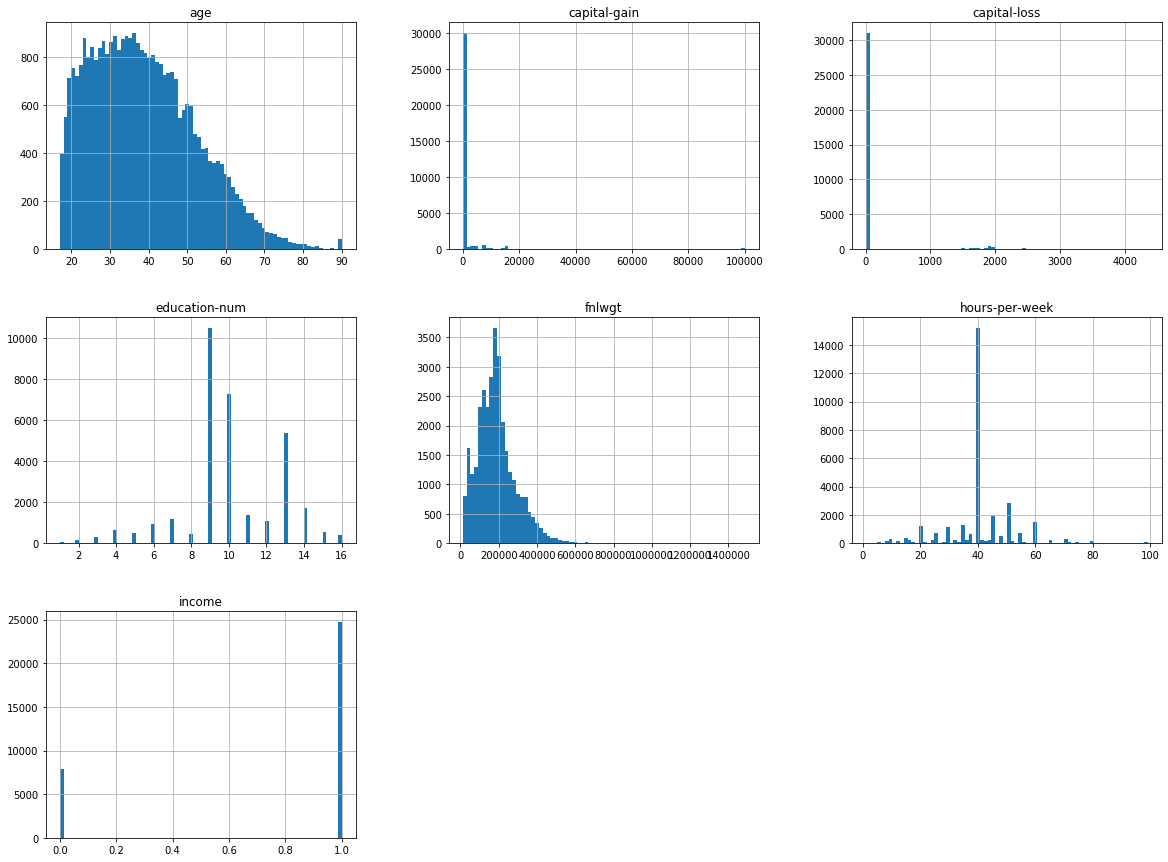

In [11]:
df.hist(bins=74, figsize=(20,15))
plt.show()

In [12]:
from statsmodels.stats.proportion import proportion_confint

def explore_categorical_feature(var, df = df, target = 'income', ci_alpha=0.05):
    # This function performs a deeper exploration of the categorical features
    cat_explore = pd.concat([df[var].value_counts(), df[var].value_counts()/df.shape[0], 
                             df.groupby(var)[target].mean()], 
                            axis=1, sort=False, keys=['Count', 'Share', 'Positive Rate'])
    cat_explore.index.name = var    
    cat_explore['ci'] = cat_explore.apply(lambda x: proportion_confint(x['Count'] * x['Positive Rate'], x['Count'],
                                                                   alpha=ci_alpha, method='jeffreys'),  axis = 1)
    cat_explore['Conf Interval Lower'] = cat_explore['ci'].apply(lambda x: x[0])
    cat_explore['Conf Interval Upper'] = cat_explore['ci'].apply(lambda x: x[1])  
    return cat_explore.drop(['ci'], axis=1).sort_values('Count', ascending = False)

In [13]:
explore_categorical_feature('workclass')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
workclass,,,,,
Private,22696,0.697030,0.781327,0.775914,0.786669
Self-emp-not-inc,2541,0.078038,0.715073,0.697285,0.732371
Local-gov,2093,0.064279,0.705208,0.685401,0.724448
?,1836,0.056386,0.895969,0.881382,0.909310
State-gov,1298,0.039864,0.728043,0.703348,0.751723
Self-emp-inc,1116,0.034274,0.442652,0.413691,0.471911
Federal-gov,960,0.029483,0.613542,0.582435,0.643965
Without-pay,14,0.000430,1.000000,0.838447,0.999966
Never-worked,7,0.000215,1.000000,0.707564,0.999932


In [14]:
explore_categorical_feature('education')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
education,,,,,
HS-grad,10501,0.322502,0.840491,0.833395,0.847400
Some-college,7291,0.223918,0.809765,0.800634,0.818651
Bachelors,5355,0.164461,0.585247,0.572009,0.598394
Masters,1723,0.052916,0.443413,0.420067,0.466948
Assoc-voc,1382,0.042443,0.738784,0.715141,0.761429
11th,1175,0.036086,0.948936,0.935230,0.960435
Assoc-acdm,1067,0.032769,0.751640,0.725058,0.776859
10th,933,0.028654,0.933548,0.916211,0.948201
7th-8th,646,0.019840,0.938080,0.917512,0.954737


In [16]:
education_explore = explore_categorical_feature('education-num').sort_index()
education_explore['education'] = df.groupby(['education-num'])['education'].max()
education_explore[['education', 'Count', 'Share', 'Positive Rate', 'Conf Interval Lower', 'Conf Interval Upper']]

,education,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
education-num,,,,,,
1,Preschool,51,0.001566,1.000000,0.952170,0.999990
2,1st-4th,168,0.005160,0.964286,0.927878,0.984958
3,5th-6th,333,0.010227,0.951952,0.924965,0.971140
4,7th-8th,646,0.019840,0.938080,0.917512,0.954737
5,9th,514,0.015786,0.947471,0.925624,0.964302
6,10th,933,0.028654,0.933548,0.916211,0.948201
7,11th,1175,0.036086,0.948936,0.935230,0.960435
8,12th,433,0.013298,0.923788,0.895951,0.945986
9,HS-grad,10501,0.322502,0.840491,0.833395,0.847400


In [17]:
explore_categorical_feature('marital-status')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
marital-status,,,,,
Married-civ-spouse,14976,0.459937,0.553152,0.545180,0.561103
Never-married,10683,0.328092,0.954039,0.949945,0.957888
Divorced,4443,0.136452,0.895791,0.886550,0.904517
Separated,1025,0.031479,0.935610,0.919344,0.949421
Widowed,993,0.030497,0.914401,0.895791,0.930600
Married-spouse-absent,418,0.012837,0.918660,0.889551,0.942001
Married-AF-spouse,23,0.000706,0.565217,0.365005,0.750122


In [18]:
explore_categorical_feature('occupation')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
occupation,,,,,
Prof-specialty,4140,0.127146,0.550966,0.535784,0.566077
Craft-repair,4099,0.125887,0.773359,0.760353,0.785980
Exec-managerial,4066,0.124873,0.515986,0.500619,0.531331
Adm-clerical,3770,0.115783,0.865517,0.854348,0.876126
Sales,3650,0.112097,0.730685,0.716115,0.744889
Other-service,3295,0.101195,0.958422,0.951199,0.964840
Machine-op-inspct,2002,0.061485,0.875125,0.860105,0.889061
?,1843,0.056601,0.896365,0.881829,0.909657
Transport-moving,1597,0.049046,0.799624,0.779460,0.818703


In [19]:
explore_categorical_feature('relationship')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
relationship,,,,,
Husband,13193,0.405178,0.551429,0.542932,0.559903
Not-in-family,8305,0.255060,0.896930,0.890252,0.903330
Own-child,5068,0.155646,0.986780,0.983351,0.989653
Unmarried,3446,0.105832,0.936738,0.928242,0.944501
Wife,1568,0.048156,0.524872,0.500128,0.549525
Other-relative,981,0.030128,0.962283,0.948970,0.972877


In [20]:
explore_categorical_feature('race')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
race,,,,,
White,27816,0.854274,0.744140,0.738987,0.749242
Black,3124,0.095943,0.876120,0.864221,0.887323
Asian-Pac-Islander,1039,0.031909,0.734360,0.706879,0.760538
Amer-Indian-Eskimo,311,0.009551,0.884244,0.845164,0.916216
Other,271,0.008323,0.907749,0.868962,0.937890


In [21]:
explore_categorical_feature('sex')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
sex,,,,,
Male,21790,0.669205,0.694263,0.688121,0.700355
Female,10771,0.330795,0.890539,0.884538,0.896331


In [22]:
explore_categorical_feature('native-country')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
native-country,,,,,
United-States,29170,0.895857,0.754165,0.749199,0.759081
Mexico,643,0.019748,0.948678,0.929572,0.963760
?,583,0.017905,0.749571,0.713226,0.783445
Philippines,198,0.006081,0.691919,0.625182,0.753092
Germany,137,0.004207,0.678832,0.597543,0.752655
Canada,121,0.003716,0.677686,0.590980,0.756006
Puerto-Rico,114,0.003501,0.894737,0.828612,0.941154
El-Salvador,106,0.003255,0.915094,0.850794,0.957156
India,100,0.003071,0.600000,0.502257,0.692048


In [23]:
explore_categorical_feature('income')

,Count,Share,Positive Rate,Conf Interval Lower,Conf Interval Upper
income,,,,,
1,24720,0.75919,1,9.998984e-01,1.00000
0,7841,0.24081,0,6.262197e-08,0.00032


In [24]:
corr = df.corr()
corr.style.background_gradient().set_precision(2)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income
age,1,-0.077,0.037,0.078,0.058,0.069,-0.23
fnlwgt,-0.077,1,-0.043,0.00043,-0.01,-0.019,0.0095
education-num,0.037,-0.043,1,0.12,0.08,0.15,-0.34
capital-gain,0.078,0.00043,0.12,1,-0.032,0.078,-0.22
capital-loss,0.058,-0.01,0.08,-0.032,1,0.054,-0.15
hours-per-week,0.069,-0.019,0.15,0.078,0.054,1,-0.23
income,-0.23,0.0095,-0.34,-0.22,-0.15,-0.23,1


# Data Preprocessing

In [27]:
# Calculate skew and sort
num_col = df.dtypes[df.dtypes != 'object'].index
skew_feats = df[num_col].skew().sort_values(ascending=False)
skewness = pd.DataFrame({'Skew': skew_feats})
skewness

,Skew
capital-gain,11.953848
capital-loss,4.594629
fnlwgt,1.446980
age,0.558743
hours-per-week,0.227643
education-num,-0.311676
income,-1.212430


In [30]:
# Split the data into features and target label
income_raw = df['income']
feature_raw = df.drop('income', axis=1)

income_raw_test = df['income']
feature_raw_test = df.drop('income', axis=1)

# Log transform the skewed feature highly-skewed feature 'capital-gain' and 'capital-loss'. 
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data=feature_raw)
features_log_transformed[skewed] = feature_raw[skewed].apply(lambda x: np.log(x + 1))

features_log_transformed_test = pd.DataFrame(data=feature_raw_test)
features_log_transformed_test[skewed] = feature_raw_test[skewed].apply(lambda x: np.log(x + 1))

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Categorical columns' names
cat_feats = features_log_transformed.dtypes[features_log_transformed.dtypes=='object'].index.tolist()
cat_idx = [features_log_transformed.columns.get_loc(col) for col in cat_feats]

# Create the encoder.
encoder = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Fit and transform the encoder on categorical features
encoded_cat_feats = encoder.fit_transform(features_log_transformed.loc[:,cat_feats])

# Extract one-hot-encoder's feature names
cat_col_name = features_log_transformed.columns.get_values()[cat_idx].tolist()
encoded_cat_feats_name = encoder.get_feature_names(cat_col_name)

# Generate OHE dataframe and concatenate it with the numerical dataframe later
encoded_cat_feats_df = pd.DataFrame(encoded_cat_feats, columns=encoded_cat_feats_name)
encoded_cat_feats_df.head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# Apply OHE above to transform the test dataset
encoded_cat_feats_test = encoder.transform(features_log_transformed_test.loc[:,cat_feats])

# Generate OHE dataframe and concatenate it with the numerical dataframe later
encoded_cat_feats_df_test = pd.DataFrame(encoded_cat_feats_test, columns=encoded_cat_feats_name)
encoded_cat_feats_df_test.head()

,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_10th,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [47]:
x_train,x_test,y_train,y_test=train_test_split(encoded_cat_feats,income_raw,test_size=.20,random_state=42)

In [48]:
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy Score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy Score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.831874712114233
[[ 831  740]
 [ 355 4587]]
              precision    recall  f1-score   support

           0       0.70      0.53      0.60      1571
           1       0.86      0.93      0.89      4942

    accuracy                           0.83      6513
   macro avg       0.78      0.73      0.75      6513
weighted avg       0.82      0.83      0.82      6513



Accuracy Score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.49547059726700443
[[1509   62]
 [3224 1718]]
              precision    recall  f1-score   support

           0       0.32      0.96      0.48      1571
           1       0.97      0.35      0.51      4942

 

C:\Users\hp\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy Score of SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False) is:
0.8232765238753262
[[ 799  772]
 [ 379 4563]]
              precision    recall  f1-score   support

           0       0.68      0.51      0.58      1571
           1       0.86      0.92      0.89      4942

    accuracy                           0.82      6513
   macro avg       0.77      0.72      0.73      6513
weighted avg       0.81      0.82      0.81      6513



Accuracy Score of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=Fals

In [52]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

import warnings
warnings.filterwarnings('ignore')

lr=LogisticRegression()

scores=cross_val_score(lr,encoded_cat_feats,income_raw,cv=5,scoring='r2')

print('Scores:',scores)
print('Mean:',scores.mean())
print('Standard Deviation:',scores.std())

Scores: [0.05039656 0.06757727 0.07429744 0.12133858 0.08185762]
Mean: 0.07909349612053325
Standard Deviation: 0.023543267901357596


In [54]:
dtc=DecisionTreeClassifier()

scores=cross_val_score(dtc,encoded_cat_feats,income_raw,cv=5,scoring='accuracy')

print('Scores:',scores)
print('Mean:',scores.mean())
print('Standard Deviation:',scores.std())

Scores: [0.81283587 0.81188575 0.81679975 0.81326781 0.80835381]
Mean: 0.8126285984070416
Standard Deviation: 0.002708348276869387


In [55]:
svc=SVC()

scores=cross_val_score(svc,encoded_cat_feats,income_raw,cv=5,scoring='accuracy')

print('Scores:',scores)
print('Mean:',scores.mean())
print('Standard Deviation:',scores.std())

Scores: [0.82343006 0.82263514 0.82324939 0.83445946 0.82816339]
Mean: 0.8263874867916783
Standard Deviation: 0.004494101783232246


In [57]:
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=200,random_state=45)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred=(rf.predict(x_test))
pred

array([1, 0, 0, ..., 0, 1, 1], dtype=int64)

In [60]:
print(rf.score(x_train,y_train))

0.8679361179361179


In [62]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

model= AdaBoostClassifier()
model.fit(x_train,y_train)
print(model.score(x_train,y_train))
abpred=model.predict(x_test)
print(abpred)

0.8290079852579852
[1 0 0 ... 0 1 1]


In [64]:
#GradientBooster
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier()
model.fit(x_test,y_test)
print(model.score(x_train,y_train))
gbpred=model.predict(x_test)
print(gbpred)

0.8266277641277642
[1 1 0 ... 0 1 1]


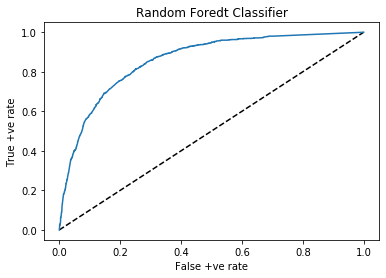

In [66]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

y_pred_prob=rf.predict_proba(x_test)[:,0]
y_pred_prob

tpr,fpr,thresholds=roc_curve(y_test,y_pred_prob)
tpr
fpr
thresholds

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False +ve rate')
plt.ylabel('True +ve rate')
plt.title('Random Foredt Classifier')
plt.show()

In [67]:
#Saving the model
from sklearn.externals import joblib
joblib.dump(rf,'census_income.pkl')

['census_income.pkl']